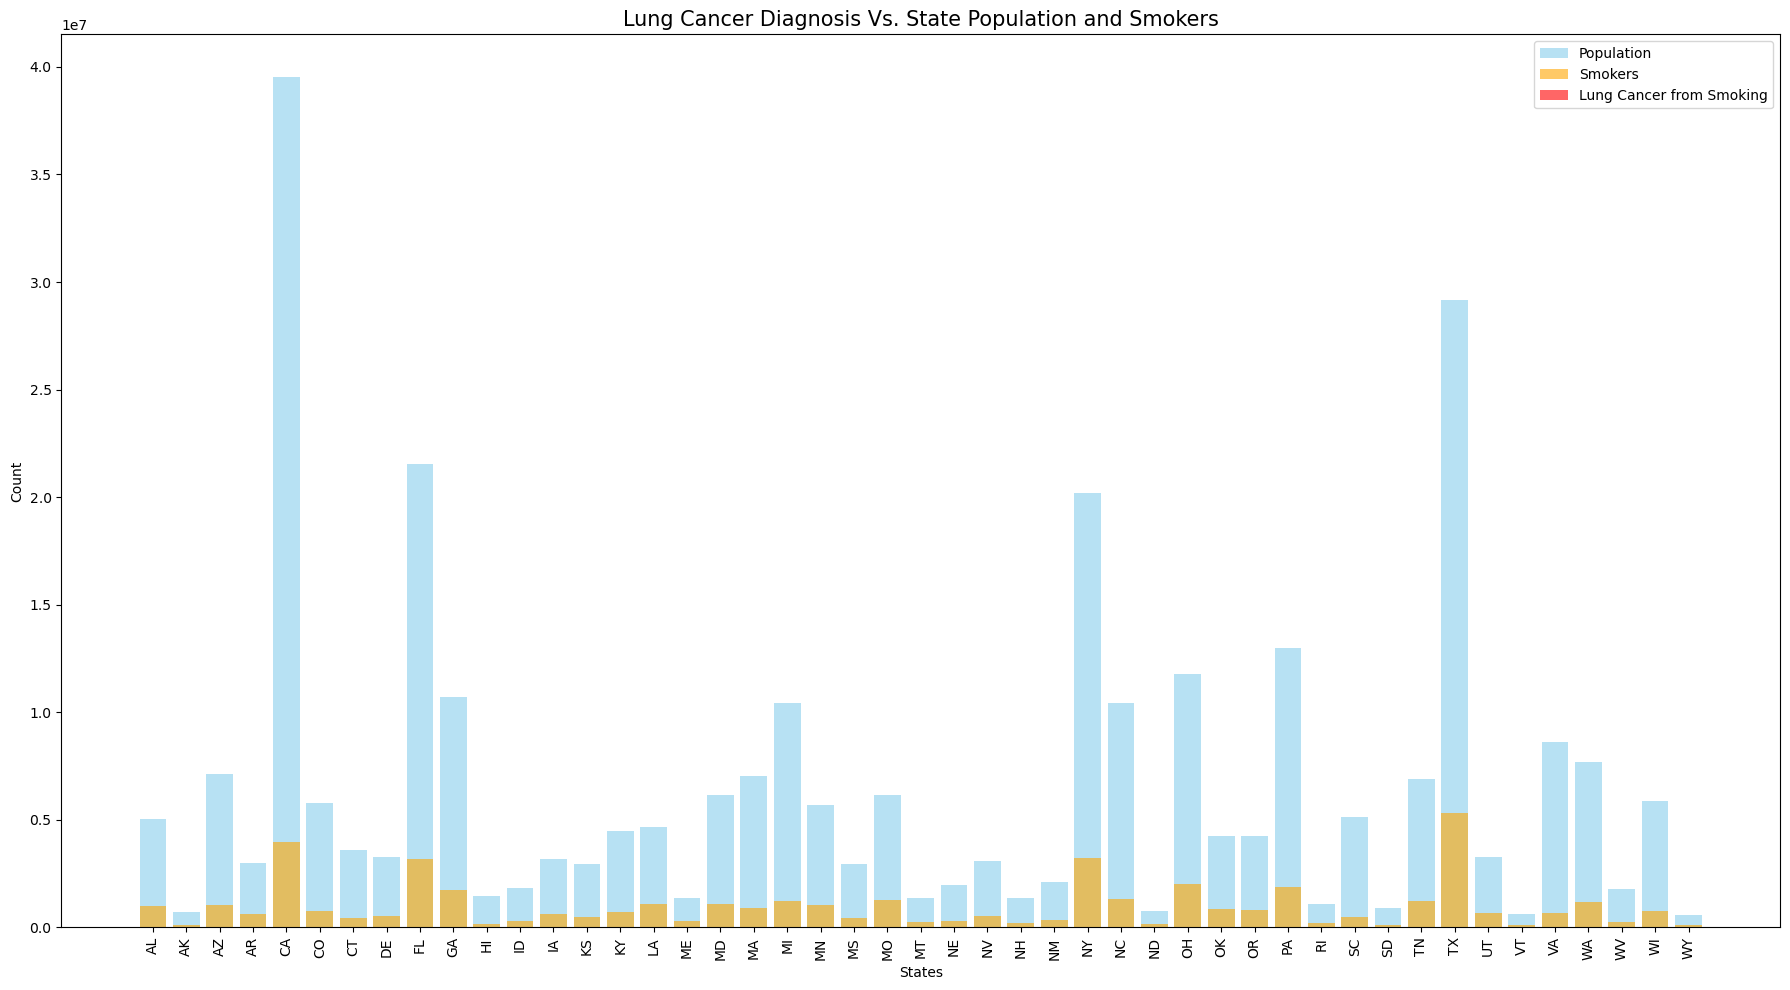

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = 'resources/Lung Cancer vs Population.csv'

# State abbreviation dictionary
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Reading the CSV file
df = pd.read_csv(file_path)

# Ensure that the state names are strings and handle missing state names
df["Incidence, US by State, All Races, Lung & Bronchus (Both Sexes), 2017 - 2021"] = df["Incidence, US by State, All Races, Lung & Bronchus (Both Sexes), 2017 - 2021"].astype(str)

# Add state abbreviations to the dataframe and handle any missing abbreviations
df["State Abbrev"] = df["Incidence, US by State, All Races, Lung & Bronchus (Both Sexes), 2017 - 2021"].map(state_abbrev)

# Drop rows where State Abbrev is missing
df.dropna(subset=["State Abbrev"], inplace=True)

# Calculating the number of lung cancer cases caused by smoking directly based on the smoking percentage
df["Lung Cancer from Smoking (Count)"] = (df["Percent of Smokers by State Population"] / 100) * df["Count of population with lung cancer"]

# Plotting the graph with the correct calculation (direct lung cancer cases from smoking)
plt.figure(figsize=(18,10))  # Widen the figure size for better visualization

# Plot 1: Population by state
plt.bar(df["State Abbrev"], df["popuation"], label="Population", color="skyblue", alpha=0.6)

# Plot 2: Smokers percentage
plt.bar(df["State Abbrev"], df["Percent of Smokers by State Population"] * df["popuation"] / 100, label="Smokers", color="orange", alpha=0.6)

# Plot 3: Lung Cancer from Smoking (direct count)
plt.bar(df["State Abbrev"], df["Lung Cancer from Smoking (Count)"], label="Lung Cancer from Smoking", color="red", alpha=0.6)

# Adding labels and title
plt.xlabel("States")
plt.ylabel("Count")
plt.title("Lung Cancer Diagnosis Vs. State Population and Smokers", fontsize=15)
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("output/Lung_Cancer_Diagnosis_vs_State_Population_and_Smokers.png")
plt.show()
